## Compute Sagnac Frequency - Noise Analysis

## Imports

In [5]:
import os
import matplotlib.pyplot as plt

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime
from numpy import log10

from andbro__savefig import __savefig

In [6]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

In [7]:
# from matplotlib import rc
# rc('text', usetex=True)

## Configurations

In [4]:
config = {}

config['datapath'] = data_path+"sagnac_frequency/prismspectra/"

config['output_figures'] = root_path+"Documents/ROMY/SagnacFrequency/"

## Load Data

 -> loading BW.DROMY.*.F1V...


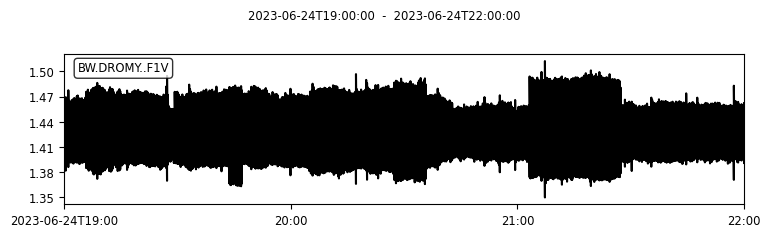

In [4]:
# from andbro__read_sds import __read_sds
# from obspy import Stream, UTCDateTime

# ## ____________________________________

# config2 = {}

# config2['seeds'] = ["BW.DROMY.*.F1V"]

# config2['path_to_sds'] = archive_path+"romy_archive/"

# config2['tbeg'] = UTCDateTime("2023-06-24 19:00")
# config2['tend'] = UTCDateTime("2023-06-24 22:00")

# ## ____________________________________

# st0 = Stream()

# for seed in config2['seeds']:

#     print(f" -> loading {seed}...")
    
#     try:
#         st00 = __read_sds(config2['path_to_sds'], seed, config2['tbeg'], config2['tend'], data_format='MSEED')
#     except:
#         print(f" -> failed for {seed}")
        
#     st0 += st00

# st0 = st0.sort() 
   
# for tr in st0:
#     tr.data = tr.data*0.59604645e-6 # V / count  [0.59604645ug  from obsidian]
    
# st0.plot(equal_scale=False);

## Plot Comparison

In [50]:
# after1 = read_pickle(config['datapath']+"psd_2023-05-01_RZ_before_prism.pkl")
# after2 = read_pickle(config['datapath']+"psd_2023-05-04_RZ_after_prism.pkl")
# after3 = read_pickle(config['datapath']+"psd_2023-06-07_RZ_after_prism_new_power_supply.pkl")

## recording signals parallel
# after1 = read_pickle(config['datapath']+"psd_2023-06-24_RZ_discrete.pkl")
# after2 = read_pickle(config['datapath']+"psd_2023-06-24_RZ_new_prism_stage_direct.pkl")
# after3 = read_pickle(config['datapath']+"psd_2023-06-24_RZ_new_prism_stage.pkl")
# after3 = read_pickle(config['datapath']+"psd_2023-06-24_RZ_mono_CCW.pkl")
# after3 = read_pickle(config['datapath']+"psd_2023-06-24_RU_noise.pkl")


## recording signals parallel
# after1 = read_pickle(config['datapath']+"psd_2023-06-26_RZ_discrete.pkl")
# after2 = read_pickle(config['datapath']+"psd_2023-06-26_RZ_prism_direct.pkl")
# after3 = read_pickle(config['datapath']+"psd_2023-06-26_RZ_prism_differential.pkl")

## compare transmission versions (clipped signal for differential channel...)
# after1 = read_pickle(config['datapath']+"psd_2023-06-26_RZ_prism_direct.pkl")
# after2 = read_pickle(config['datapath']+"psd_2023-06-26_RZ_prism_electronics.pkl")
# after3 = read_pickle(config['datapath']+"psd_2023-06-26_RZ_prism_differential.pkl")
# # after3 = read_pickle(config['datapath']+"psd_2023-06-26_RU_noise.pkl")


## compare transmission versions (with endpieces removed and gain 490 for loop and sag)
# after1 = read_pickle(config['datapath']+"psd_2023-07-06_RZ_prism_electronics.pkl")
# after2 = read_pickle(config['datapath']+"psd_2023-07-06_RZ_prism_direct.pkl")
# after3 = read_pickle(config['datapath']+"psd_2023-07-06_RZ_prism_differential.pkl")

# after1 = read_pickle(config['datapath']+"psd_2023-07-07_RZ_prism_electronics.pkl")
# after2 = read_pickle(config['datapath']+"psd_2023-07-07_RZ_prism_direct.pkl")
# after3 = read_pickle(config['datapath']+"psd_2023-07-07_RZ_prism_diode.pkl")

## with short time series (30 min; 3 min windows) with no signals.. low noise floor
after1 = read_pickle(config['datapath']+"psd_2023-07-16_RZ_prism_electronics_30min_quiet.pkl")
after2 = read_pickle(config['datapath']+"psd_2023-07-16_RZ_prism_direct_30min_quiet.pkl")
after3 = read_pickle(config['datapath']+"psd_2023-07-16_RZ_prism_diode_30min_quiet.pkl")

## with short time series (30 min; 3 min windows) PD with lab power supply
after1 = read_pickle(config['datapath']+"psd_2023-07-20_RZ_prism_electronics.pkl")
after2 = read_pickle(config['datapath']+"psd_2023-07-20_RZ_prism_direct.pkl")
after3 = read_pickle(config['datapath']+"psd_2023-07-20_RZ_prism_diode.pkl")


# after1['fjz_psd_db'] = 20*log10(after1.fjz_psd)
# after2['fjz_psd_db'] = 20*log10(after2.fjz_psd)
# after3['fjz_psd_db'] = 20*log10(after3.fjz_psd)
after1['fjz_psd_db'] = 20*log10(after1.fjz_psd/max(after1.fjz_psd))
after2['fjz_psd_db'] = 20*log10(after2.fjz_psd/max(after2.fjz_psd))
after3['fjz_psd_db'] = 20*log10(after3.fjz_psd/max(after3.fjz_psd))

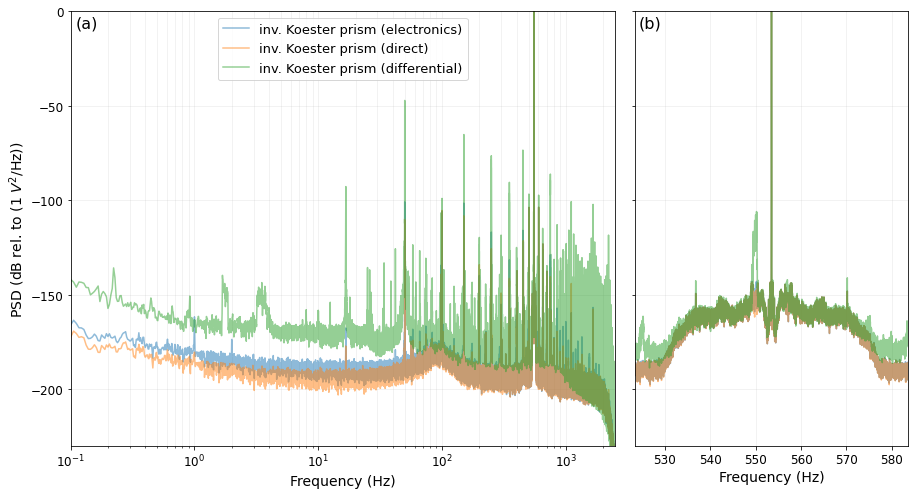

In [51]:
def __makeplot():

    from matplotlib.gridspec import GridSpec

    font = 14


    fig = plt.figure(figsize=(15,8))

    plt.subplots_adjust(wspace=0.05)

    gs = GridSpec(1, 2, width_ratios=[2, 1])

    ax1 = fig.add_subplot(gs[0])
    ax1.semilogx(after1.frequencies, after1.fjz_psd_db, alpha=0.5, color="tab:blue", label="inv. Koester prism (electronics)")
    ax1.semilogx(after2.frequencies, after2.fjz_psd_db, alpha=0.5, color="tab:orange", label="inv. Koester prism (direct)")
    ax1.semilogx(after3.frequencies, after3.fjz_psd_db, alpha=0.5, color="tab:green", label="inv. Koester prism (differential)", zorder=2)

#     ax1.semilogx(after3.frequencies, after1.fjz_psd_db-after3.fjz_psd_db, alpha=0.5, color="tab:green", label="inv. Koester prism (differential)", zorder=2)

    
    ax1.grid(alpha=0.2, which="both")
    ax1.set_xlabel("Frequency (Hz)", fontsize=font)
    ax1.set_ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
    ax1.legend(loc="upper center", fontsize=font-1)
    ax1.set_ylim(-230, 0)
    ax1.tick_params(labelsize=font-2)   

    ax1.set_xlim(0.1, 2500)


    ax2 = fig.add_subplot(gs[1])
    ax2.plot(after1.frequencies, after1.fjz_psd_db, alpha=0.5, color="tab:blue")
    ax2.plot(after2.frequencies, after2.fjz_psd_db, alpha=0.5, color="tab:orange")
    ax2.plot(after3.frequencies, after3.fjz_psd_db, alpha=0.5, color="tab:green", zorder=2)
    
#     ax2.plot(after3.frequencies, after1.fjz_psd_db-after3.fjz_psd_db, alpha=0.5, color="tab:green", zorder=2)

    ax2.set_xlim(553.5-30, 553.5+30)
    ax2.set_xlabel("Frequency (Hz)", fontsize=font)
    ax2.grid(alpha=0.2, which="both")
    ax2.set_ylim(-230, 0)
    ax2.tick_params(labelsize=font-2)   
    ax2.set_yticklabels([])

    ax1.text(.01, .99, '(a)', ha='left', va='top', transform=ax1.transAxes, fontsize=font+2)
    ax2.text(.01, .99, '(b)', ha='left', va='top', transform=ax2.transAxes, fontsize=font+2)


    plt.show();
    return fig

fig = __makeplot();

In [41]:
# fig.savefig(config['output_figures']+f"prism_comparison_20230716_0200_0230_30min_quiet.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

## Discrete vs. Prism

In [52]:
# discrete = read_pickle(config['datapath']+"psd_2023-07-05_RZ_discrete.pkl")
# prism = read_pickle(config['datapath']+"psd_2023-07-05_RZ_prism_differential.pkl")

# discrete = read_pickle(config['datapath']+"psd_2023-07-06_RZ_discrete.pkl")
# prism = read_pickle(config['datapath']+"psd_2023-07-06_RZ_prism_differential.pkl")

## with short time series (30 min; 3 min windows) with no signals.. low noise floor
discrete = read_pickle(config['datapath']+"psd_2023-07-16_RZ_prism_discrete_30min_quiet.pkl")
prism = read_pickle(config['datapath']+"psd_2023-07-16_RZ_prism_electronics_30min_quiet.pkl")

## with short time series (30 min; 3 min windows) PD with lab power supply
discrete = read_pickle(config['datapath']+"psd_2023-07-20_RZ_prism_discrete.pkl")
prism = read_pickle(config['datapath']+"psd_2023-07-20_RZ_prism_electronics.pkl")


discrete['fjz_psd_db'] = 20*log10(discrete.fjz_psd/max(discrete.fjz_psd))
prism['fjz_psd_db'] = 20*log10(prism.fjz_psd/max(prism.fjz_psd))

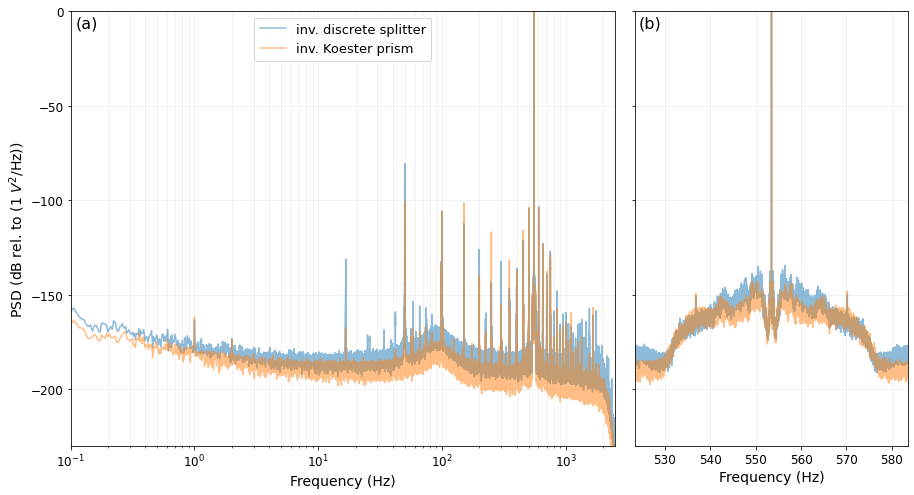

In [56]:
def __makeplot2():

    from matplotlib.gridspec import GridSpec

    font = 14


    fig = plt.figure(figsize=(15,8))

    plt.subplots_adjust(wspace=0.05)

    gs = GridSpec(1, 2, width_ratios=[2, 1])

    ax1 = fig.add_subplot(gs[0])
    ax1.semilogx(discrete.frequencies, discrete.fjz_psd_db, alpha=0.5, color="tab:blue", label="inv. discrete splitter")
    ax1.semilogx(prism.frequencies, prism.fjz_psd_db, alpha=0.5, color="tab:orange", label="inv. Koester prism ")

    ax1.grid(alpha=0.2, which="both")
    ax1.set_xlabel("Frequency (Hz)", fontsize=font)
    ax1.set_ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
    ax1.legend(loc="upper center", fontsize=font-1)
    ax1.set_ylim(-230, 0)
    ax1.tick_params(labelsize=font-2)   

    ax1.set_xlim(0.1, 2500)


    ax2 = fig.add_subplot(gs[1])
    ax2.plot(discrete.frequencies, discrete.fjz_psd_db, alpha=0.5, color="tab:blue")
    ax2.plot(prism.frequencies, prism.fjz_psd_db, alpha=0.5, color="tab:orange")

    ax2.set_xlim(553.5-30, 553.5+30)
    ax2.set_xlabel("Frequency (Hz)", fontsize=font)
    ax2.grid(alpha=0.2, which="both")
    ax2.set_ylim(-230, 0)
    ax2.tick_params(labelsize=font-2)   
    ax2.set_yticklabels([])

    ax1.text(.01, .99, '(a)', ha='left', va='top', transform=ax1.transAxes, fontsize=font+2)
    ax2.text(.01, .99, '(b)', ha='left', va='top', transform=ax2.transAxes, fontsize=font+2)


    plt.show();
    return fig
    
fig = __makeplot2()

In [55]:
# fig.savefig(config['output_figures']+f"discrete_prism_comparison_20230716_0200_0230_30min_quiet.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

## Compare with Noise

In [37]:
signal = read_pickle(config['datapath']+"psd_2023-06-26_RZ_prism_differential.pkl")
signal['fjz_psd_db'] = 20*log10(signal.fjz_psd)

In [28]:
## RW channel, loose cable with 50 Ohm endpiece  [2023-06-01  11:30 - 14:30 UTC]

noise1 = read_pickle(config['datapath']+"psd_2023-06-01_noise_NoConnection_Endpiece.pkl")
noise1['fjz_psd_db'] = 20*log10(noise1.fjz_psd)

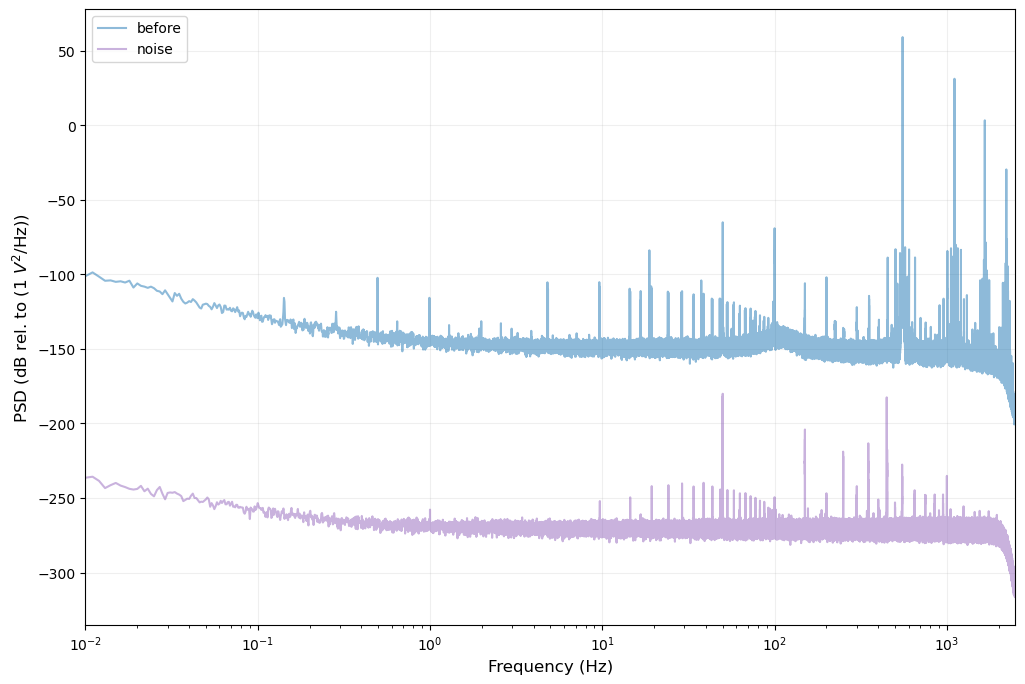

In [30]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(signal.frequencies, signal.fjz_psd_db, alpha=0.5, color="tab:blue", label="before")

ax.semilogx(noise1.frequencies, noise1.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")

plt.grid(alpha=0.2)
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2)

plt.show();

In [31]:
## RU channel, electronics off, PMT power off [2023-06-01  11:30 - 14:30 UTC]

noise2 = read_pickle(config['datapath']+"psd_2023-06-01_noise_PmtPowerOff_ElectronicsOff.pkl")
noise2['fjz_psd_db'] = 20*log10(noise2.fjz_psd)

In [ ]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(signal.frequencies, signal.fjz_psd_db, alpha=0.5, color="tab:blue", label="before")

ax.semilogx(noise2.frequencies, noise2.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")

plt.grid(alpha=0.2)
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2)

plt.show();

In [32]:
## RZ channel, electronics on, PMT power on, PMT blocked [2023-06-01  11:30 - 14:30 UTC]

# noise3 = read_pickle(config['datapath']+"psd_2023-06-01_noise_PmtPowerOn_ElectricsOn_PmtBlocked.pkl")

## RZ channel, electronics on, PMT power on, PMT blocked [2023-06-09  00:00 - 03:00 UTC]
noise3 = read_pickle(config['datapath']+"psd_2023-06-09_RZ_noise_no_lasing.pkl")
noise3['fjz_psd_db'] = 20*log10(noise3.fjz_psd)

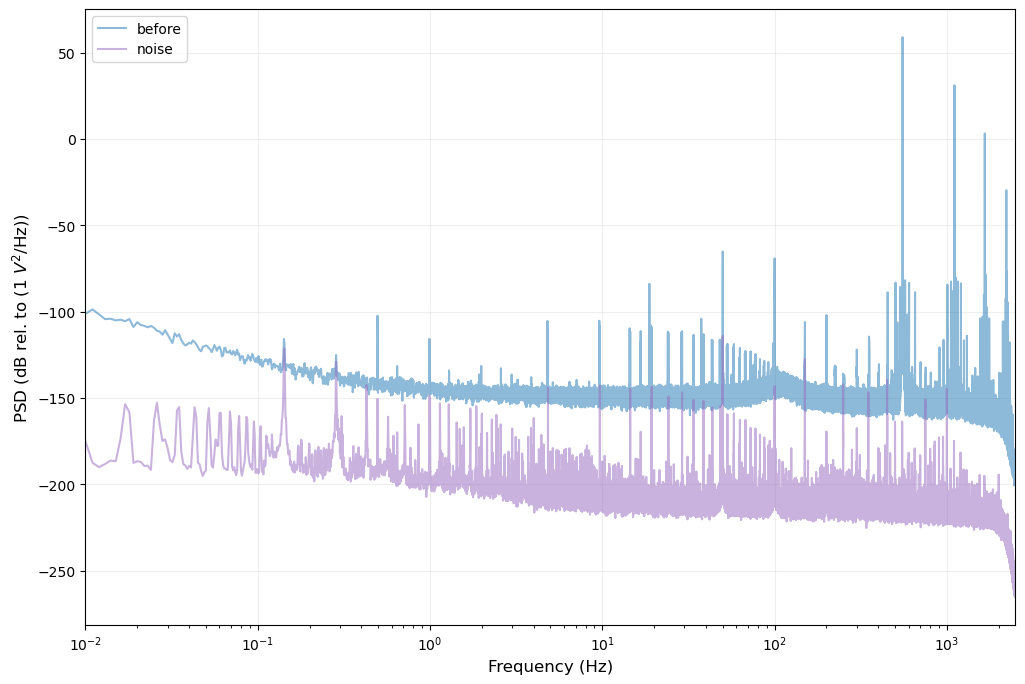

In [33]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(signal.frequencies, signal.fjz_psd_db, alpha=0.5, color="tab:blue", label="before")

ax.semilogx(noise3.frequencies, noise3.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")

plt.grid(alpha=0.2)
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2)

plt.show();

In [34]:
## channel RZ, self noise with no adapter only obsidian [ 2023-06-07 09:40 - 12:40 UTC]

noise4 = read_pickle(config['datapath']+"psd_2023-06-07_RZ_selfnoise_obsidian.pkl")
noise4['fjz_psd_db'] = 20*log10(noise4.fjz_psd)

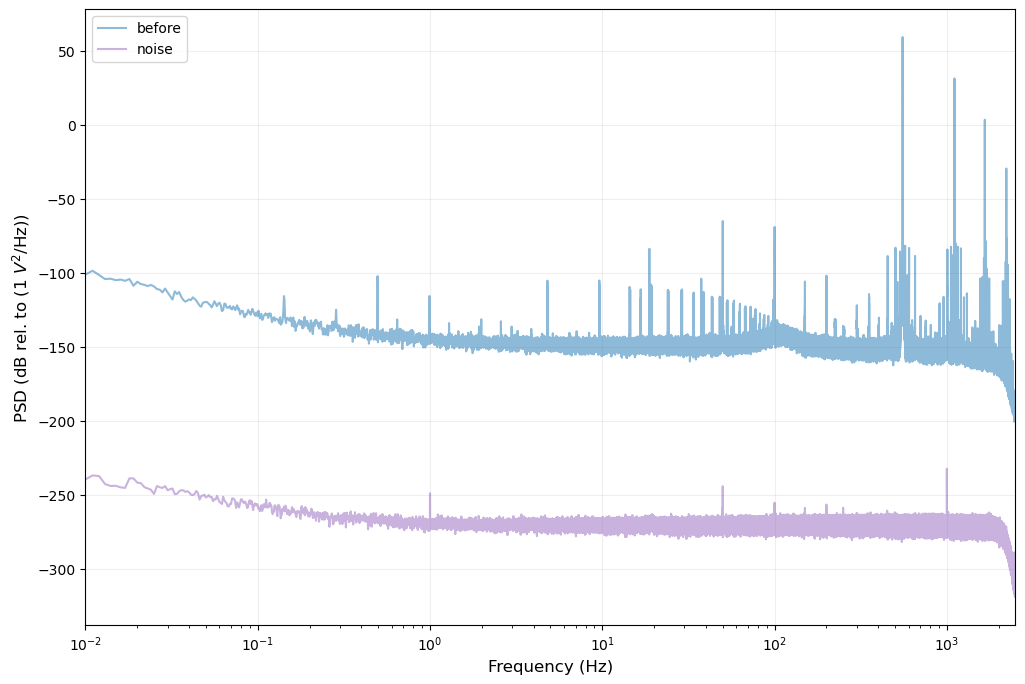

In [36]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(signal.frequencies, signal.fjz_psd_db, alpha=0.5, color="tab:blue", label="before")

ax.semilogx(noise4.frequencies, noise4.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")

plt.grid(alpha=0.2)
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2)

plt.show();

## All Noise together

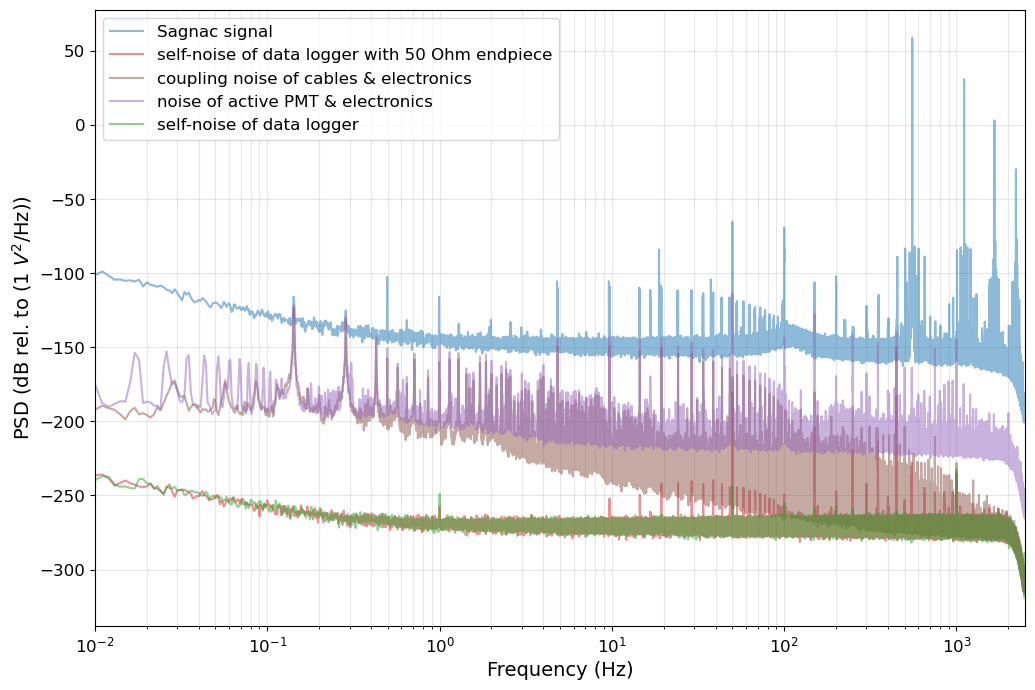

In [38]:
font = 14

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(signal.frequencies, signal.fjz_psd_db, alpha=0.5, color="tab:blue", label="Sagnac signal")

ax.semilogx(noise1.frequencies, noise1.fjz_psd_db, alpha=0.5, color="tab:red", label="self-noise of data logger with 50 Ohm endpiece")
ax.semilogx(noise2.frequencies, noise2.fjz_psd_db, alpha=0.5, color="tab:brown", label="coupling noise of cables & electronics")
ax.semilogx(noise3.frequencies, noise3.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise of active PMT & electronics")
ax.semilogx(noise4.frequencies, noise4.fjz_psd_db, alpha=0.5, color="tab:green", label="self-noise of data logger")


plt.grid(alpha=0.3, which="both")
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2,fontsize=font-2)

plt.tick_params(labelsize=font-2)   

plt.show();